# Simulacion de distribuciones por radio censal

**A continuación se detalla:**

1. Estimación del total de viviendas/hogares cuando la información del precenso 2020 es desconocida
2. Estimación del total de viviendas/hogares por categorías a partir del total estimado en `1`.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from datasources import (
    personas_radios_prov,
    tipoviv_radios_prov,
    radios_prov,
    radios_eph_censo_2010,
    persproy_depto_2025
)

2023-05-19 12:45:12.224 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 12:45:12.226 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 12:45:12.227 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 12:45:12.228 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 12:45:12.229 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-05-19 12:45:12.230 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [4]:
from modeling_tools import (
    simulate_total_var,
    simulate_cat_var
)

In [5]:
# GEOMETRIAS
envolvente = radios_eph_censo_2010(aglo_idx='08')
chaco_2001 = radios_prov(year=2001, prov='chaco', mask=envolvente)
chaco_2010 = radios_prov(year=2010, prov='chaco', mask=envolvente)

In [6]:
# TABLAS REDATAM - HOGARES/VIVIENDAS
tipo_2001 = tipoviv_radios_prov(year=2001, prov='chaco',var_types={'link':'object'})
tipo_2001_geo = chaco_2001.set_index('link').join(tipo_2001.set_index('link'))
tipo_2010 = tipoviv_radios_prov(year=2010, prov='chaco',var_types={'link':'object'})
tipo_2010_geo = chaco_2010.set_index('link').join(tipo_2010.set_index('link'))

In [7]:
# TABLAS REDATAM - PERSONAS
pers_2001 = personas_radios_prov(year=2001, prov='chaco', var_types={'link':'object'})
pers_2001_geo = chaco_2001.set_index('link').join(pers_2001.set_index('link'))
pers_2010 = personas_radios_prov(year=2010, prov='chaco', var_types={'link':'object'})
pers_2010_geo = chaco_2010.set_index('link').join(pers_2010.set_index('link'))

In [8]:
# Tabla de proyecciones de poblacion por departamento
proy = persproy_depto_2025(prov='chaco')

In [9]:
# Total viviendas 2020
tipo_2010_geo['total_2020'] = simulate_total_var(gdf_pers_01=pers_2001_geo, gdf_var_01=tipo_2001_geo, 
                                                 gdf_pers_10=pers_2010_geo, gdf_var_10=tipo_2010_geo,
                                                 proy_df=proy, namedept='San Fernando', 
                                                 base_year='2010', forecast_year='2020',
                                                 catname='total')

The total number of projected households/residential units is 132131


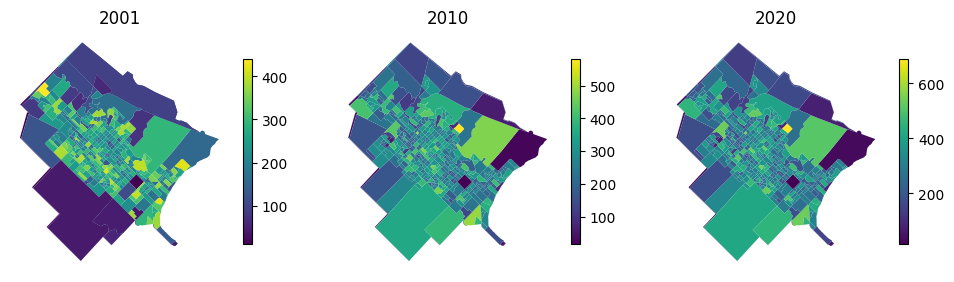

In [10]:
# CHEQUEO TOTALES VIVIENDA
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(1,3,1)
ax2 = f.add_subplot(1,3,2)
ax3 = f.add_subplot(1,3,3)

tipo_2001_geo.plot(ax=ax1, column='total', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax2, column='total', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax3, column='total_2020', legend=True, legend_kwds={'shrink': 0.3})

ax1.set_title('2001')
ax1.set_axis_off()
ax2.set_title('2010')
ax2.set_axis_off()
ax3.set_title('2020')
ax3.set_axis_off();

In [11]:
# Con catname uso la distribucion de una variable en 2001 y de otra en 2010 en funcion del diccionario que pasamos como parametro
# TODO: Para mezclar categorias de distintos dataframes (por ejemplo, 'recoleccion de basura en 2001' y 'rancho en 2010') habria
# que agregar las columnas deseadas tanto en gdf_var_01 o gdf_var_10.
simulated_distribution = simulate_cat_var(gdf_var_01=tipo_2001_geo, 
                                          gdf_var_10=tipo_2010_geo,
                                          base_year='0110', forecast_year='2020',
                                          forecast_gdf=tipo_2010_geo, pct_val=2.5, 
                                          catname={'2001':'casilla', '2010':'rancho'}, tot_colname='total_2020')

tipo_2010_geo['informal_2020'] = tipo_2010_geo.index.map(simulated_distribution)

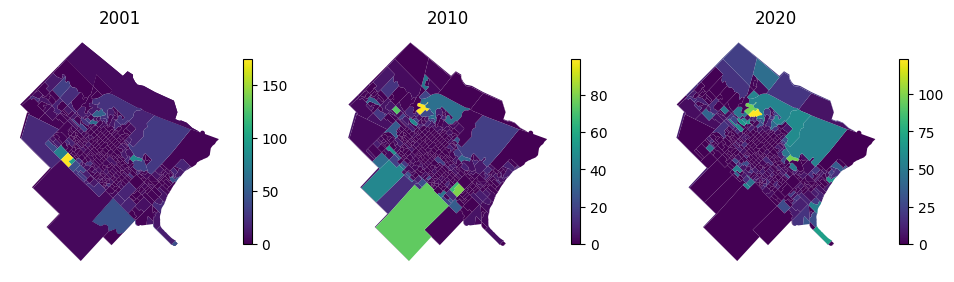

In [12]:
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(1,3,1)
ax2 = f.add_subplot(1,3,2)
ax3 = f.add_subplot(1,3,3)

tipo_2001_geo.plot(ax=ax1, column='casilla', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax2, column='casilla', legend=True, legend_kwds={'shrink': 0.3})
tipo_2010_geo.plot(ax=ax3, column='informal_2020', legend=True, legend_kwds={'shrink': 0.3})

ax1.set_title('2001')
ax1.set_axis_off()
ax2.set_title('2010')
ax2.set_axis_off()
ax3.set_title('2020')
ax3.set_axis_off();